In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_old = pd.read_csv('hospital_readmissions.csv')
df_old.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


In [3]:
df_old.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
dtype: int64

In [4]:
df_old['A1C_Result']

0           NaN
1           NaN
2        Normal
3           NaN
4           NaN
         ...   
995      Normal
996      Normal
997      Normal
998    Abnormal
999    Abnormal
Name: A1C_Result, Length: 1000, dtype: object

In [5]:
print(df_old['A1C_Result'].describe())

count          566
unique           2
top       Abnormal
freq           301
Name: A1C_Result, dtype: object


#### splitting the dataset into null and value dataset

In [6]:
# dataframe with NaN values
nan_df = df_old[df_old.isnull().any(axis=1)]

# dataframe with normal and abnormal values
data_df = df_old.dropna()


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 2 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             566 non-null    int64 
 1   Age                    566 non-null    int64 
 2   Gender                 566 non-null    object
 3   Admission_Type         566 non-null    object
 4   Diagnosis              566 non-null    object
 5   Num_Lab_Procedures     566 non-null    int64 
 6   Num_Medications        566 non-null    int64 
 7   Num_Outpatient_Visits  566 non-null    int64 
 8   Num_Inpatient_Visits   566 non-null    int64 
 9   Num_Emergency_Visits   566 non-null    int64 
 10  Num_Diagnoses          566 non-null    int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             566 non-null    object
dtypes: int64(8), object(5)
memory usage: 61.9+ KB


In [8]:
nan_df = nan_df.drop(columns=['Readmitted'])

#### encoding for null dataset columns

In [9]:
from sklearn.preprocessing import LabelEncoder

# label encoding for A1C_Result

label_encoder = LabelEncoder()
nan_df['A1C_Result'] = label_encoder.fit_transform(nan_df['A1C_Result'])

# Get A1C_Result unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array([nan], dtype=object), 'encoded': array([0])}


In [10]:
# label encoding for gender

label_encoder = LabelEncoder()
nan_df['Gender'] = label_encoder.fit_transform(nan_df['Gender'])

# Get gender unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['Female', 'Male', 'Other'], dtype=object), 'encoded': array([0, 1, 2])}


In [11]:
# label encoding for Admission_Type

label_encoder = LabelEncoder()
nan_df['Admission_Type'] = label_encoder.fit_transform(nan_df['Admission_Type'])

# Get Admission_Type unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['Elective', 'Emergency', 'Urgent'], dtype=object), 'encoded': array([0, 1, 2])}


In [12]:
 #label encoding for Diagnosis

label_encoder = LabelEncoder()
nan_df['Diagnosis'] = label_encoder.fit_transform(nan_df['Diagnosis'])

# Get Diagnosis unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['Diabetes', 'Heart Disease', 'Infection', 'Injury'], dtype=object), 'encoded': array([0, 1, 2, 3])}


In [13]:
nan_df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result
0,1,69,2,1,1,33,2,4,1,1,5,0
1,2,32,0,2,0,81,10,4,4,1,6,0
3,4,38,1,0,0,77,11,2,3,4,9,0
4,5,41,0,2,0,50,25,3,4,1,3,0
5,6,20,1,0,3,11,20,3,4,1,3,0


#### data preprocessing for df which have data

In [14]:
data_df = data_df.drop(columns=['Readmitted'])

#### encoding for value dataset column

In [15]:
# label encoding for A1C_Result

label_encoder = LabelEncoder()
data_df['A1C_Result'] = label_encoder.fit_transform(data_df['A1C_Result'])

# Get readmitted unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['Abnormal', 'Normal'], dtype=object), 'encoded': array([0, 1])}


In [16]:
# label encoding for gender

label_encoder = LabelEncoder()
data_df['Gender'] = label_encoder.fit_transform(data_df['Gender'])

# Get gender unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['Female', 'Male', 'Other'], dtype=object), 'encoded': array([0, 1, 2])}


In [17]:
# label encoding for Admission_Type

label_encoder = LabelEncoder()
data_df['Admission_Type'] = label_encoder.fit_transform(data_df['Admission_Type'])

# Get Admission_Type unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['Elective', 'Emergency', 'Urgent'], dtype=object), 'encoded': array([0, 1, 2])}


In [18]:
#label encoding for Diagnosis

label_encoder = LabelEncoder()
data_df['Diagnosis'] = label_encoder.fit_transform(data_df['Diagnosis'])

# Get Diagnosis unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['Diabetes', 'Heart Disease', 'Infection', 'Injury'], dtype=object), 'encoded': array([0, 1, 2, 3])}


In [19]:
data_df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result
2,3,78,0,2,1,75,29,4,0,3,5,1
7,8,70,0,0,1,28,19,4,0,3,7,1
8,9,19,1,2,2,70,23,1,2,4,6,1
9,10,47,1,1,3,41,24,4,0,0,3,0
11,12,19,0,1,3,68,14,2,4,2,5,0


#### Model building with A1C result as target variable

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [21]:
X = data_df[['Age','Gender','Admission_Type','Diagnosis','Num_Lab_Procedures','Num_Medications','Num_Outpatient_Visits',
        'Num_Inpatient_Visits','Num_Emergency_Visits','Num_Diagnoses']]
y = data_df['A1C_Result']

#### splitting the dataset

In [22]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### RandomForest Classifier

In [23]:
rf_model = RandomForestClassifier(max_depth=10,n_estimators=100)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [24]:
y_pred_rf = rf_model.predict(X_test)

In [25]:
y_pred_rf

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0])

#### fill the null values with the predicted values

In [26]:
# Predict the missing values in 'A1C_Result' column
X_pred = nan_df[['Age', 'Gender', 'Admission_Type', 'Diagnosis', 'Num_Lab_Procedures',
                 'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits',
                 'Num_Emergency_Visits', 'Num_Diagnoses']]
y_pred = rf_model.predict(X_pred)

# Fill the missing values in the original DataFrame with the predicted values
nan_df['A1C_Result'] = y_pred

# Concatenate the DataFrame with non-missing values and the modified DataFrame with filled values
filled_df = pd.concat([data_df, nan_df])


In [27]:
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2 to 994
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Patient_ID             1000 non-null   int64
 1   Age                    1000 non-null   int64
 2   Gender                 1000 non-null   int32
 3   Admission_Type         1000 non-null   int32
 4   Diagnosis              1000 non-null   int32
 5   Num_Lab_Procedures     1000 non-null   int64
 6   Num_Medications        1000 non-null   int64
 7   Num_Outpatient_Visits  1000 non-null   int64
 8   Num_Inpatient_Visits   1000 non-null   int64
 9   Num_Emergency_Visits   1000 non-null   int64
 10  Num_Diagnoses          1000 non-null   int64
 11  A1C_Result             1000 non-null   int32
dtypes: int32(4), int64(8)
memory usage: 85.9 KB


#### Add readmitted column to the newly filled df

In [28]:
new_column_values = df_old['Readmitted'].values 

# Add the column to filled_df
filled_df['Readmitted'] = new_column_values



In [29]:
# label encoding for Readmitted

label_encoder = LabelEncoder()
filled_df['Readmitted'] = label_encoder.fit_transform(filled_df['Readmitted'])

# Get Readmitted unique values and their corresponding encoded values

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['No', 'Yes'], dtype=object), 'encoded': array([0, 1])}


In [30]:
filled_df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
2,3,78,0,2,1,75,29,4,0,3,5,1,1
7,8,70,0,0,1,28,19,4,0,3,7,1,0
8,9,19,1,2,2,70,23,1,2,4,6,1,0
9,10,47,1,1,3,41,24,4,0,0,3,0,1
11,12,19,0,1,3,68,14,2,4,2,5,0,1


#### Summary statistics

In [31]:
filled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,51.665,21.989459,18.0,34.00,50.5,69.00,150.0
Gender,1000.0,0.980,0.808860,0.0,0.00,1.0,2.00,2.0
Admission_Type,1000.0,0.973,0.814208,0.0,0.00,1.0,2.00,2.0
Diagnosis,1000.0,1.463,1.132216,0.0,0.00,1.0,2.00,3.0
Num_Lab_Procedures,1000.0,50.836,28.075137,1.0,27.00,52.0,75.00,99.0
Num_Medications,1000.0,15.661,8.230177,1.0,9.00,16.0,23.00,35.0
Num_Outpatient_Visits,1000.0,2.016,1.399894,0.0,1.00,2.0,3.00,4.0
Num_Inpatient_Visits,1000.0,2.019,1.416561,0.0,1.00,2.0,3.00,4.0
Num_Emergency_Visits,1000.0,1.956,1.409983,0.0,1.00,2.0,3.00,4.0


#### Outliers detection

In [32]:
Q1= filled_df.quantile(0.25)
Q3 = filled_df.quantile(0.75)

IQR = Q3-Q1

threshold = 1.5

outliers = (filled_df < (Q1 - threshold * IQR)) | (filled_df > (Q3 + threshold * IQR))

print("\nOutliers:")
print(outliers.sum())


Outliers:
Patient_ID                0
Age                      10
Gender                    0
Admission_Type            0
Diagnosis                 0
Num_Lab_Procedures        0
Num_Medications           0
Num_Outpatient_Visits     0
Num_Inpatient_Visits      0
Num_Emergency_Visits      0
Num_Diagnoses             0
A1C_Result                0
Readmitted                0
dtype: int64


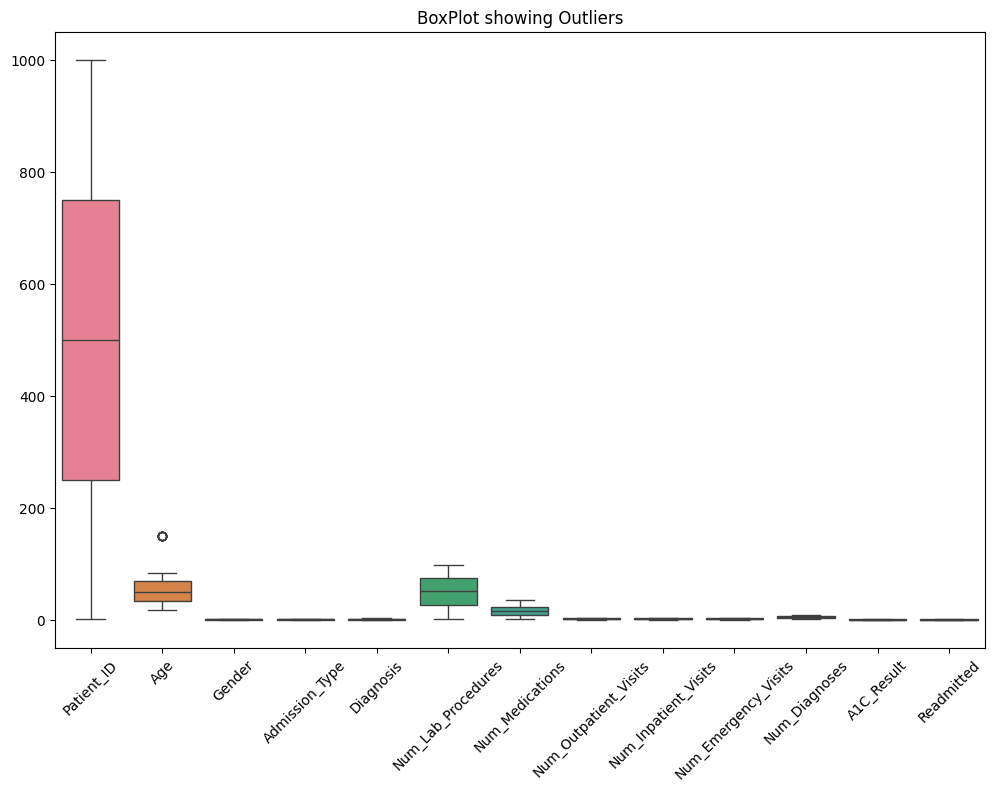

In [33]:
import seaborn as sns

# create box plot for outliers

plt.figure(figsize=(12, 8))
sns.boxplot(data = filled_df)
plt.title("BoxPlot showing Outliers")
plt.xticks(rotation=45)
plt.show()

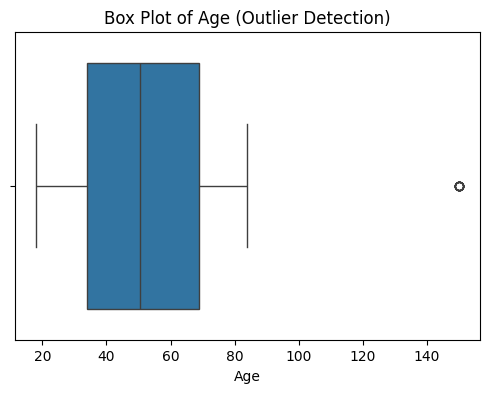

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=filled_df['Age'])
plt.title('Box Plot of Age (Outlier Detection)')
plt.xlabel('Age')
plt.show()


In [35]:
# replace the outlier values (values greater than 100) with the mean age

mean_age = filled_df['Age'].mean()
filled_df['Age'] = filled_df['Age'].apply(lambda x: mean_age if x > 100 else x)

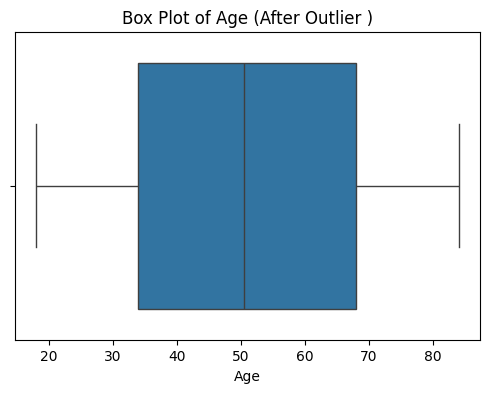

In [36]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=filled_df['Age'])
plt.title('Box Plot of Age (After Outlier )')
plt.xlabel('Age')
plt.show()

In [37]:
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2 to 994
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             1000 non-null   int64  
 1   Age                    1000 non-null   float64
 2   Gender                 1000 non-null   int32  
 3   Admission_Type         1000 non-null   int32  
 4   Diagnosis              1000 non-null   int32  
 5   Num_Lab_Procedures     1000 non-null   int64  
 6   Num_Medications        1000 non-null   int64  
 7   Num_Outpatient_Visits  1000 non-null   int64  
 8   Num_Inpatient_Visits   1000 non-null   int64  
 9   Num_Emergency_Visits   1000 non-null   int64  
 10  Num_Diagnoses          1000 non-null   int64  
 11  A1C_Result             1000 non-null   int32  
 12  Readmitted             1000 non-null   int32  
dtypes: float64(1), int32(5), int64(7)
memory usage: 89.8 KB


#### Feature Selection 

#### Chi Square and ANOVA

In [38]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Split features and target variable

X = filled_df.drop(columns=['Readmitted'])  # Features
y = filled_df['Readmitted']  # Target variable

# Perform univariate feature selection
selector = SelectKBest(score_func=chi2, k='all')  # Use chi-square test for categorical features
X_chi2 = selector.fit_transform(X, y)
chi2_scores = selector.scores_

selector = SelectKBest(score_func=f_classif, k='all')  # Use ANOVA F-test for numerical features
X_f_classif = selector.fit_transform(X, y)
f_classif_scores = selector.scores_

# Print feature scores
print("Chi-square scores for categorical features:")
print(chi2_scores)

print("\nANOVA F-test scores for numerical features:")
print(f_classif_scores)

Chi-square scores for categorical features:
[1.64006404e+01 2.11105310e+00 2.17054181e+00 2.73866427e-02
 2.16041464e-01 5.67307748e+00 1.41829594e+00 2.03791921e+00
 2.50489503e+00 8.07263057e-01 1.87601166e-03 2.11428924e-01]

ANOVA F-test scores for numerical features:
[9.83150242e-02 2.77142262e-01 3.25858039e+00 4.01572453e-02
 2.46374167e-01 3.65654112e-01 3.27699383e-01 2.09876823e+00
 2.52416218e+00 7.94084376e-01 1.32309485e-03 3.76266701e-01]


In [39]:
# Create DataFrame with feature names and corresponding scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi-square Score': chi2_scores, 'ANOVA F-test Score': f_classif_scores})

# Sort the DataFrame by scores in descending order
sorted_feature_scores = feature_scores.sort_values(by=['Chi-square Score', 'ANOVA F-test Score'], ascending=False)

# Print the top features with highest scores
print("Top features with highest chi-square scores:")
print(sorted_feature_scores[['Feature', 'Chi-square Score']])

print("\nTop features with highest ANOVA F-test scores:")
print(sorted_feature_scores[['Feature', 'ANOVA F-test Score']])

Top features with highest chi-square scores:
                  Feature  Chi-square Score
0              Patient_ID         16.400640
5      Num_Lab_Procedures          5.673077
8    Num_Inpatient_Visits          2.504895
2                  Gender          2.170542
1                     Age          2.111053
7   Num_Outpatient_Visits          2.037919
6         Num_Medications          1.418296
9    Num_Emergency_Visits          0.807263
4               Diagnosis          0.216041
11             A1C_Result          0.211429
3          Admission_Type          0.027387
10          Num_Diagnoses          0.001876

Top features with highest ANOVA F-test scores:
                  Feature  ANOVA F-test Score
0              Patient_ID            0.098315
5      Num_Lab_Procedures            0.365654
8    Num_Inpatient_Visits            2.524162
2                  Gender            3.258580
1                     Age            0.277142
7   Num_Outpatient_Visits            2.098768
6         Num

#### Model building with statistically significant column

In [41]:
X = filled_df[['Age','Gender','Num_Lab_Procedures','Num_Inpatient_Visits','Num_Outpatient_Visits']]
y = filled_df['Readmitted']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Scaling

In [43]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic regression model

In [44]:
# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [45]:

# Predict the target variable on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.49


#### Hyperparameter tuning

In [46]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

#### Random Forest Classifier

In [47]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [48]:
# Initialize GridSearchCV with the classifier and parameter grid

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')


In [49]:
# Perform grid search cross-validation
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [50]:
# Predict the target variable on the testing set using the best model
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.475
Confusion Matrix:
[[52 49]
 [56 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.51      0.50       101
           1       0.47      0.43      0.45        99

    accuracy                           0.48       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200



#### Gradient Boosting Machine

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()

In [52]:
# train the model

gbm_model.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [53]:
# predict the model 
y_pred_gbm = gbm_model.predict(X_test_scaled)

In [54]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gbm)
conf_matrix = confusion_matrix(y_test, y_pred_gbm)
class_report = classification_report(y_test, y_pred_gbm)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.51
Confusion Matrix:
[[54 47]
 [51 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       101
           1       0.51      0.48      0.49        99

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



#### predictions

In [55]:
# Make predictions
rf_predictions = best_rf_model.predict_proba(X_test)[:, 1]  # Predict probabilities of positive class
gb_predictions = gbm_model.predict_proba(X_test)[:, 1]

# Define threshold
threshold = 0.5  

# Identify high-risk patients
rf_high_risk_patients = rf_predictions > threshold
gb_high_risk_patients = gb_predictions > threshold

# Count high-risk patients
num_rf_high_risk_patients = sum(rf_high_risk_patients)
num_gb_high_risk_patients = sum(gb_high_risk_patients)

print("Random Forest - Number of High-Risk Patients:", num_rf_high_risk_patients)
print("Gradient Boosting - Number of High-Risk Patients:", num_gb_high_risk_patients)

Random Forest - Number of High-Risk Patients: 199
Gradient Boosting - Number of High-Risk Patients: 198


c:\Users\Parthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Parthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


#### creating sample data for predictions

In [56]:
# Define the number of samples to generate
num_samples = 100

# Create sample data by sampling with replacement from the original data
sample_data = filled_df.sample(n=num_samples, replace=True)

# Reset the index of the sample data
sample_data.reset_index(drop=True, inplace=True)


In [57]:
# List of selected features
selected_features = ['Age','Gender','Num_Lab_Procedures','Num_Inpatient_Visits','Num_Outpatient_Visits']

# Create a new DataFrame containing only the selected features
sample_data = filled_df[selected_features].copy()

In [58]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected features and transform the data
scaled_sample_data = scaler.fit_transform(sample_data)

# Create a new DataFrame with the scaled data
scaled_sample_df = pd.DataFrame(scaled_sample_data, columns=sample_data.columns)



In [59]:

# Make predictions on the preprocessed sample data
sample_predictions = model.predict(scaled_sample_df)  

# probability
sample_predictions1 = model.predict_proba(scaled_sample_df)

threshold = 0.5
binary_predictions = (sample_predictions1 > threshold).astype(int)

print("Predictions:")
print(sample_predictions)

print("Predicted Probabilities:")
print(sample_predictions1)

print("Binary Predictions (with threshold = 0.5):")
print(binary_predictions)

Predictions:
[1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1
 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1
 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1
 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1
 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0
 1 1 1 0 1 1

c:\Users\Parthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Parthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [60]:
# Count the number of samples predicted to belong to each class
positive_count = np.sum(sample_predictions)
negative_count = len(sample_predictions) - positive_count

# Calculate the percentage of samples in each class
total_count = len(sample_predictions)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

# Print the consolidated results
print("Consolidated Predictions:")
print(f"Positive Class (High Risk of Hospital Readmission): {positive_count} samples ({positive_percentage:.2f}%)")
print(f"Negative Class (Low Risk of Hospital Readmission): {negative_count} samples ({negative_percentage:.2f}%)")

Consolidated Predictions:
Positive Class (High Risk of Hospital Readmission): 485 samples (48.50%)
Negative Class (Low Risk of Hospital Readmission): 515 samples (51.50%)


In [71]:
filled_df.to_csv('new_filled_df.csv', index=False)

#### filter based on A1C_Result and Readmitted

In [66]:
abnormal_readmitted = filled_df[(filled_df['A1C_Result']==0)& (filled_df['Readmitted']==1)]
normal_not_admitted = filled_df[(filled_df['A1C_Result']==1) & (filled_df['Readmitted']==0)]
abnormal_not_readmitted= filled_df[(filled_df['A1C_Result']==0)& (filled_df['Readmitted']==0)]
normal_readmitted = filled_df[(filled_df['A1C_Result']==1) & (filled_df['Readmitted']==1)]

In [67]:
abnormal_readmitted.shape

(288, 13)

In [68]:
normal_not_admitted.shape

(213, 13)

In [69]:
abnormal_not_readmitted.shape

(290, 13)

In [70]:
normal_readmitted.shape

(209, 13)